In [56]:
import numpy             as np
import gvar              as gv
import matplotlib.pyplot as plt
import pandas            as pd
import lsqfit
import itertools
from tqdm import tqdm

In [57]:
from b2heavy.FnalHISQMetadata import params as mData

In [58]:
from b2heavy.ThreePointFunctions.globalfit import RatioSet

In [59]:
DATA_DIR = '/Users/pietro/code/data_analysis/BtoD/Alex/'
DATA_2PT = '/Users/pietro/Desktop/lattice24/0.25/corr2_3'

In [60]:
ENSEMBLE = 'Coarse-Phys'

In [61]:
MOMLIST = ['000','100','200','300','400']
RATLIST = ['ZRA1','RA1','XFSTPAR','XV','R0','R1']

SMSLIST = ['1S','RW']

cov_specs = dict(scale=True,shrink=True,cutsvd=1E-12)

In [62]:
rset = RatioSet(ENSEMBLE,MOMLIST,RATLIST,SMSLIST)
rset.collect(DATA_DIR,DATA_2PT)

100%|██████████| 21/21 [00:04<00:00,  5.21it/s]


In [43]:
rset.remove(
    ('000','ZRA1','RW'),
)

In [44]:
priors = rset.params()

In [45]:
TMIN     = 2

fit = rset.fit(
    tmin   = TMIN,
    priors = priors,
    **cov_specs
)   

rset.show(fit)


f0                        A_1S  \
mom ratio                                              
000 ZRA1      0.8329(85)      [0.030(13), 0.039(14)]   
100 RA1        0.795(17)      [0.065(16), 0.065(16)]   
    XFSTPAR   0.0548(37)    [-0.024(10), -0.003(16)]   
    XV        0.0780(45)   [-0.0099(85), 0.0033(70)]   
    R0       -0.0709(60)     [0.020(13), -0.005(11)]   
    R1        1.0202(96)    [-0.040(15), -0.021(13)]   
200 RA1        0.777(21)      [0.052(21), 0.051(21)]   
    XFSTPAR   0.1071(40)    [-0.044(11), -0.006(20)]   
    XV        0.1527(58)   [-0.024(10), -0.0027(96)]   
    R0       -0.1440(77)      [0.035(15), 0.005(13)]   
    R1         1.013(11)    [-0.032(17), -0.009(17)]   
300 RA1        0.690(61)      [0.040(31), 0.040(31)]   
    XFSTPAR   0.1568(51)  [-0.064(13), -0.0008(343)]   
    XV        0.2174(77)    [-0.031(13), -0.007(14)]   
    R0        -0.201(10)      [0.049(20), 0.010(18)]   
    R1         0.999(18)    [-0.038(21), -0.010(25)]   
400 RA1        0.690(39)    [-0.010(40), -0.009(40)]   
    XFSTPAR   0.2063(80)     [-0.096(17), 0.022(70)]   
    XV         0.277(10)    [-0.047(17), -0.014(20)]   
    R0        -0.259(15)      [0.082(26), 0.015(28)]   
    R1         0.971(26)    [-0.018(26), -0.025(46)]   

                                  A_RW                        B_1S  \
mom ratio                                                            
000 ZRA1                          None      [0.030(13), 0.039(14)]   
100 RA1         [0.198(30), 0.177(28)]      [0.065(16), 0.065(16)]   
    XFSTPAR    [0.001(13), -0.013(21)]    [-0.024(10), -0.003(16)]   
    XV       [-0.0025(89), 0.0063(86)]   [-0.0099(85), 0.0033(70)]   
    R0         [0.022(14), -0.003(10)]     [0.020(13), -0.005(11)]   
    R1         [-0.010(20), 0.007(18)]    [-0.040(15), -0.021(13)]   
200 RA1         [0.193(33), 0.173(31)]      [0.052(21), 0.051(21)]   
    XFSTPAR    [0.011(13), -0.004(22)]    [-0.044(11), -0.006(20)]   
    XV         [-0.010(11), 0.007(11)]   [-0.024(10), -0.0027(96)]   
    R0          [0.032(16), 0.003(12)]      [0.035(15), 0.005(13)]   
    R1         [-0.035(20), 0.032(21)]    [-0.032(17), -0.009(17)]   
300 RA1         [0.161(40), 0.144(37)]      [0.040(31), 0.040(31)]   
    XFSTPAR     [0.018(15), 0.033(38)]  [-0.064(13), -0.0008(343)]   
    XV         [-0.013(14), 0.016(14)]    [-0.031(13), -0.007(14)]   
    R0         [0.033(19), -0.008(17)]      [0.049(20), 0.010(18)]   
    R1         [-0.044(25), 0.059(31)]    [-0.038(21), -0.010(25)]   
400 RA1         [0.161(42), 0.142(39)]    [-0.010(40), -0.009(40)]   
    XFSTPAR     [0.019(18), 0.100(87)]     [-0.096(17), 0.022(70)]   
    XV         [-0.027(18), 0.033(18)]    [-0.047(17), -0.014(20)]   
    R0          [0.071(26), 0.019(27)]      [0.082(26), 0.015(28)]   
    R1         [-0.069(28), 0.072(50)]    [-0.018(26), -0.025(46)]   

                                  B_RW  
mom ratio                               
000 ZRA1                          None  
100 RA1         [0.198(30), 0.177(28)]  
    XFSTPAR    [0.001(13), -0.013(21)]  
    XV       [-0.0025(89), 0.0063(86)]  
    R0         [0.022(14), -0.003(10)]  
    R1         [-0.010(20), 0.007(18)]  
200 RA1         [0.193(33), 0.173(31)]  
    XFSTPAR    [0.011(13), -0.004(22)]  
    XV         [-0.010(11), 0.007(11)]  
    R0          [0.032(16), 0.003(12)]  
    R1         [-0.035(20), 0.032(21)]  
300 RA1         [0.161(40), 0.144(37)]  
    XFSTPAR     [0.018(15), 0.033(38)]  
    XV         [-0.013(14), 0.016(14)]  
    R0         [0.033(19), -0.008(17)]  
    R1         [-0.044(25), 0.059(31)]  
400 RA1         [0.161(42), 0.142(39)]  
    XFSTPAR     [0.019(18), 0.100(87)]  
    XV         [-0.027(18), 0.033(18)]  
    R0          [0.071(26), 0.019(27)]  
    R1         [-0.069(28), 0.072(50)]

In [46]:
rset.fit_result(TMIN,fit,priors=priors)

# ---------- Global fit in 2 for ens: Coarse-Phys --------------
Least Square Fit:
  chi2/dof [dof] = 1.3 [369]    Q = 0.00027    logGBF = 1091

Parameters:
            dE_D      0.292 (23)      [    0.5 (1.0) ]  
            dM_B      0.272 (26)      [    0.5 (1.0) ]  
            dM_D       0.76 (49)      [    0.5 (1.0) ]  
     ZRA1_000_f0     0.8329 (85)      [    1.0 (1.5) ]  
   ZRA1_000_1S 0      0.030 (13)      [      0 ± 1.0 ]  
               1      0.039 (14)      [      0 ± 1.0 ]  
      RA1_100_f0      0.795 (17)      [    0.9 (1.5) ]  
    RA1_100_1S 0      0.065 (16)      [      0 ± 1.0 ]  
               1      0.065 (16)      [      0 ± 1.0 ]  
    RA1_100_RW 0      0.198 (30)      [      0 ± 1.0 ]  
               1      0.177 (28)      [      0 ± 1.0 ]  
  XFSTPAR_100_f0     0.0548 (37)      [  0.06 (1.50) ]  
XFSTPAR_100_1S 0     -0.024 (10)      [      0 ± 1.0 ]  
               1     -0.003 (16)      [      0 ± 1.0 ]  
XFSTPAR_100_RW 0      0.001 (13)      [      

{'fit': <lsqfit.nonlinear_fit at 0x183651d90>,
 'chi2red': 469.988886357251,
 'chi2aug': 470.5155163025783,
 'chiexp': 368.9999999999908,
 'pexp': 0.0,
 'pstd': 0.003146051670914272}

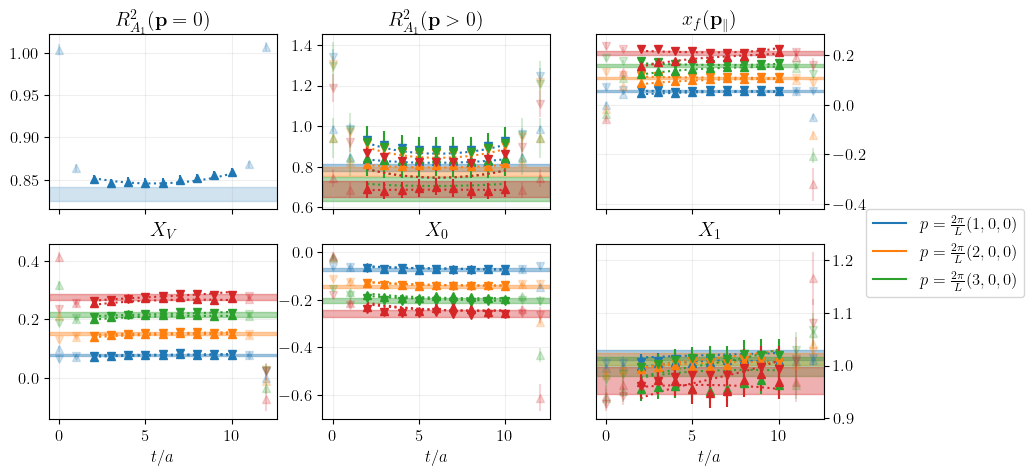

In [47]:
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 12

f, ax = plt.subplots(2,3,figsize=(10,5), sharex=True)

rset.plot_fit('ZRA1'   ,fit,ax[0,0])
ax[0,0].set_title(r'$R_{A_1}^2(\mathbf{p}=0)$')
ax[0,0].grid(alpha=0.2)

rset.plot_fit('RA1'    ,fit,ax[0,1])
ax[0,1].set_title(r'$R_{A_1}^2(\mathbf{p}>0)$')
ax[0,1].grid(alpha=0.2)

rset.plot_fit('XFSTPAR',fit,ax[0,2])
ax[0,2].yaxis.set_label_position('right')
ax[0,2].yaxis.tick_right()
ax[0,2].set_title(r'$x_f(\mathbf{p}_\parallel)$')
ax[0,2].grid(alpha=0.2)


rset.plot_fit('XV'     ,fit,ax[1,0])
ax[1,0].set_title(r'$X_V$')
ax[1,0].set_xlabel(r'$t/a$')
ax[1,0].grid(alpha=0.2)

rset.plot_fit('R0'     ,fit,ax[1,1])
ax[1,1].set_title(r'$X_0$')
ax[1,1].set_xlabel(r'$t/a$')
ax[1,1].grid(alpha=0.2)

rset.plot_fit('R1'     ,fit,ax[1,2])
ax[1,2].yaxis.set_label_position('right')
ax[1,2].yaxis.tick_right()
ax[1,2].set_title(r'$X_1$')
ax[1,2].set_xlabel(r'$t/a$')
ax[1,2].grid(alpha=0.2)


ax[1,2].errorbar([],[],color='C0',label=r'$p = \frac{2\pi}{L}(1,0,0)$')
ax[1,2].errorbar([],[],color='C1',label=r'$p = \frac{2\pi}{L}(2,0,0)$')
ax[1,2].errorbar([],[],color='C2',label=r'$p = \frac{2\pi}{L}(3,0,0)$')
ax[1,2].legend(bbox_to_anchor=(1.15, 1.25))


# plt.tight_layout()
# plt.savefig(
#     f'/Users/pietro/code/latex/Lattice2024/beamer-presentation-template/PLOTS/ratio_gfit_Dst.pdf',
#     transparent=True
# )
# plt.subplots_adjust(hspace=0.05)

# Form factors

In [48]:
rs = {m: {} for m in MOMLIST}

for k in fit.p:
    if k.endswith('f0'):
        rat,mom,_ = k.split('_')
        rs[mom][rat] = fit.p[k]

df = pd.DataFrame(rs).transpose()
df['w'  ] = (1+df['XFSTPAR']**2)/(1-df['XFSTPAR']**2)
df.loc['000','w']   =  gv.gvar('1.0(0.00001)')
df.loc['000','RA1'] =  df.loc['000','ZRA1']
df.drop('ZRA1',axis=1,inplace=True)

df['RA1'] = df['RA1']**0.5

In [49]:
print(df)

            RA1     XFSTPAR          XV           R0          R1             w
000  0.9126(47)         NaN         NaN          NaN         NaN  1.000000(10)
100  0.8917(95)  0.0548(37)  0.0780(45)  -0.0709(60)  1.0202(96)   1.00602(82)
200   0.881(12)  0.1071(40)  0.1527(58)  -0.1440(77)   1.013(11)    1.0232(17)
300   0.831(37)  0.1568(51)  0.2174(77)   -0.201(10)   0.999(18)    1.0504(34)
400   0.831(24)  0.2063(80)   0.277(10)   -0.259(15)   0.971(26)    1.0889(72)


### $h_{A_1}(w) = \rho_{A_j}\frac{2R_{A_1}}{w+1}$

In [50]:
ha1 = 2*df['RA1']/(df['w']+1)
ha1

000    0.9126(47)
100    0.8891(95)
200     0.871(12)
300     0.810(36)
400     0.795(23)
dtype: object

In [51]:
pmask = [p for p in MOMLIST if p!='000']
dfz = df.loc[pmask]

### $h_{A_2}(w) = \frac{2R_{A_1}}{{w^2-1}} (w R_1 -\frac{\rho_{A_4}}{\rho_{A_j}} \sqrt{w^2-1}R_0 - 1)$

In [52]:
ha2 = 2*dfz['RA1']/(dfz['w']**2-1) * ((dfz['w']*dfz['R1']) - (dfz['w']**2-1.)**0.5 * (-1) * dfz['R0'] - 1)
ha2

100     2.7(1.4)
200     0.19(43)
300    -0.25(31)
400    -0.48(26)
dtype: object

### $h_{A_3}(w) = \frac{2R_{A_1}}{w^2-1}(w-R_1)$

In [53]:
ha3 = 2*dfz['RA1']/(dfz['w']**2-1) * (dfz['w'] - dfz['R1'])
ha3

100    -2.1(1.5)
200     0.39(42)
300     0.83(30)
400     1.05(23)
dtype: object

### $h_V(w) = \frac{2R_{A_1}}{\sqrt{w^2-1}}X_V$

In [54]:
hv = 2*dfz['RA1']/((dfz['w']**2-1)**0.5) * dfz['XV']
hv

100     1.27(11)
200    1.242(68)
300    1.123(75)
400    1.067(68)
dtype: object

### all together

In [55]:
ff = pd.concat([ha1,ha2,ha3,hv],axis=1)
ff.rename(columns={0:'hA1',1:'hA2',2:'hA3',3:'hV'},inplace=True)
ff

,hA1,hA2,hA3,hV
000,0.9126(47),NaN,NaN,NaN
100,0.8891(95),2.7(1.4),-2.1(1.5),1.27(11)
200,0.871(12),0.19(43),0.39(42),1.242(68)
300,0.810(36),-0.25(31),0.83(30),1.123(75)
400,0.795(23),-0.48(26),1.05(23),1.067(68)
